## Bonus: 資料清理、資料視覺化與資料分析

到這邊我們已經將需要的票房資料與評論星等、內容都爬下來囉!

在進入分析之前，我們需要對抓下來的資料做一些簡單的清洗

### 1. 票房資料清洗
票房的資料可以看到是以 str 儲存，為了方便之後的分析，要轉成數字型態 float or int

In [1]:
import pandas as pd 
movie_box = pd.read_csv("data/movies_box_office.csv")
movie_box.head()

排名          中文片名                                     英文片名  院數   映期  \
0   1  美國隊長3 : 英雄內戰                        Captain America 3  24   86   
1   2       惡棍英雄：死侍                                 Deadpool  23   80   
2   3          屍速列車                           Train to Busan  22   78   
3   4      怪獸與牠們的產地  Fantastic Beasts and Where to Find Them  24  113   
4   5          奇異博士                           Doctor Strange  23  108   

         上映日期       平均票房         累積票房    年度  
0  2016/04/27  7,652,852  183,668,450  2016  
1  2016/02/09  6,200,975  142,622,425  2016  
2  2016/09/02  6,047,077  133,035,683  2016  
3  2016/11/17  4,942,212  118,613,078  2016  
4  2016/10/25  5,049,736  116,143,931  2016

In [2]:
movie_box["平均票房"] = movie_box["平均票房"].str.replace(",", "").astype("float")
movie_box["累積票房"] = movie_box["累積票房"].str.replace(",", "").astype("float")

In [3]:
movie_box.head()

排名          中文片名                                     英文片名  院數   映期  \
0   1  美國隊長3 : 英雄內戰                        Captain America 3  24   86   
1   2       惡棍英雄：死侍                                 Deadpool  23   80   
2   3          屍速列車                           Train to Busan  22   78   
3   4      怪獸與牠們的產地  Fantastic Beasts and Where to Find Them  24  113   
4   5          奇異博士                           Doctor Strange  23  108   

         上映日期       平均票房         累積票房    年度  
0  2016/04/27  7652852.0  183668450.0  2016  
1  2016/02/09  6200975.0  142622425.0  2016  
2  2016/09/02  6047077.0  133035683.0  2016  
3  2016/11/17  4942212.0  118613078.0  2016  
4  2016/10/25  5049736.0  116143931.0  2016

In [4]:
movie_box.to_csv("data/movies_box_office_revised.csv", index = False, encoding="utf-8") # 儲存清洗後的資料

### 2. 評論資料清洗
電影名稱那邊可以看到中文跟英文都並在一起，透過 pandas 簡單的 split 函數可以拆開來

In [5]:
movies_comments = pd.read_csv("data/movies_comments.csv")
movies_comments.head()

comments  \
0   難看.機場戰鬥變兒戲.鋼鐵人跟美國隊長戰鬥更是沒壯觀場面.普通拳打腳踢.特效動作場面都普普通通.   
1                            中間看到睡著,梗沒什麼變化,打來打去而已...   
2  漫威這次終於拍出富有劇情內涵&精彩動作的電影了真的是今年目前最好看的超級英雄電影!!!如果只...   
3  只覺得黑寡婦在這部戲裡打得好辛苦啊....演黑寡婦真的越來越不容易了!其他的不方便爆雷囉。但...   
4  抱著一桶爆米花喝著可樂！享受接下來的時間。不過水不要喝太多！因為毫無冷場的情節你是不會想錯過...   

                                            movie  star  
0  美國隊長3：英雄內戰\n      Captain America: Civil War\n     1  
1  美國隊長3：英雄內戰\n      Captain America: Civil War\n     3  
2  美國隊長3：英雄內戰\n      Captain America: Civil War\n     5  
3  美國隊長3：英雄內戰\n      Captain America: Civil War\n     5  
4  美國隊長3：英雄內戰\n      Captain America: Civil War\n     5

In [6]:
movies_comments["movie"].str.split("\n", 2, expand=True).head()

0                                 1 2
0  美國隊長3：英雄內戰        Captain America: Civil War  
1  美國隊長3：英雄內戰        Captain America: Civil War  
2  美國隊長3：英雄內戰        Captain America: Civil War  
3  美國隊長3：英雄內戰        Captain America: Civil War  
4  美國隊長3：英雄內戰        Captain America: Civil War

In [7]:
movies_comments["movie_cht"] = movies_comments["movie"].str.split("\n", 2, expand=True)[0] # 拆開的第一部份存成 movie_cht
movies_comments["movie_eng"] = movies_comments["movie"].str.split("\n", 2, expand=True)[1] # 拆開的第二部份存成 movie_eng
del movies_comments["movie"]

In [8]:
movies_comments.head()

comments  star   movie_cht  \
0   難看.機場戰鬥變兒戲.鋼鐵人跟美國隊長戰鬥更是沒壯觀場面.普通拳打腳踢.特效動作場面都普普通通.     1  美國隊長3：英雄內戰   
1                            中間看到睡著,梗沒什麼變化,打來打去而已...     3  美國隊長3：英雄內戰   
2  漫威這次終於拍出富有劇情內涵&精彩動作的電影了真的是今年目前最好看的超級英雄電影!!!如果只...     5  美國隊長3：英雄內戰   
3  只覺得黑寡婦在這部戲裡打得好辛苦啊....演黑寡婦真的越來越不容易了!其他的不方便爆雷囉。但...     5  美國隊長3：英雄內戰   
4  抱著一桶爆米花喝著可樂！享受接下來的時間。不過水不要喝太多！因為毫無冷場的情節你是不會想錯過...     5  美國隊長3：英雄內戰   

                          movie_eng  
0        Captain America: Civil War  
1        Captain America: Civil War  
2        Captain America: Civil War  
3        Captain America: Civil War  
4        Captain America: Civil War

In [9]:
movies_comments.to_csv("data/movies_comments_revised.csv", index = False, encoding="utf-8") # 儲存清洗後的資料

## 文字探勘與文字雲
這邊會利用 jieba, wordcloud 這兩個套件，帶大家玩一些簡單的文字探勘，並用文字雲把斷詞後的結果畫出來

In [10]:
import jieba
import jieba.analyse
import numpy as np
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] # 設定 matplotlib 的中文字體
jieba.set_dictionary('data/dict.txt.big')  # 設定 jiebe 使用斷詞的語料庫

In [11]:
movies_comments = pd.read_csv("data/movies_comments_revised.csv")
neg = movies_comments[(movies_comments["star"] == 1)]  # 取出所有一顆星的評論
pos = movies_comments[(movies_comments["star"] == 5)]  # 取出所有五顆星的評論

In [12]:
neg_text = ''.join(neg["comments"])  # 將 list of string 轉變成一個大字串
pos_text = ''.join(pos["comments"])  # 將 list of string 轉變成一個大字串

In [13]:
jieba.add_word('不好看') # 加上不好看這個詞

Building prefix dict from C:\Users\jimmy\Documents\GitHub\dsc-crawling\Session_B\practice\data\dict.txt.big ...
Loading model from cache C:\Users\jimmy\AppData\Local\Temp\jieba.uef1272f50990cb768dbca893a9616da4.cache
Loading model cost 1.244 seconds.
Prefix dict has been built succesfully.


In [14]:
neg_list = jieba.cut(neg_text)  # 將大字串斷詞後變成一個 list
pos_list = jieba.cut(pos_text)  # 將大字串斷詞後變成一個 list

In [15]:
with open('data/stop_words.txt','r', encoding='utf-8') as f:
    stopwords = f.readlines()
    stopwords = [x.replace("\n","") for x in stopwords]
    
neg_text_filtered = ' '.join([word for word in neg_list if word not in stopwords]) #將停止詞濾掉
pos_text_filtered = ' '.join([word for word in pos_list if word not in stopwords]) #將停止詞濾掉

In [16]:
neg_text_list = [item for item in neg_text_filtered.split(" ") if item.split()] #保留非空白的詞
pos_text_list = [item for item in pos_text_filtered.split(" ") if item.split()] #保留非空白的詞

In [17]:
neg_counter = Counter(neg_text_list) # Counter 可以幫忙對 list 做記數
print(neg_counter.most_common(20))

[('難看', 500), ('爛片', 432), ('錢', 234), ('浪費', 233), ('無聊', 227), ('⋯', 193), ('好看', 192), ('拍', 180), ('睡', 176), ('失望', 162), ('特效', 151), ('整部', 146), ('一堆', 142), ('再', 141), ('爛', 141), ('演', 133), ('工讀生', 131), ('看過', 130), ('內容', 124), ('一顆', 123)]


In [18]:
pos_counter = Counter(pos_text_list) # Counter 可以幫忙對 list 做記數
print(pos_counter.most_common(20))

[('好看', 6030), ('超', 1263), ('值得', 1000), ('冷場', 944), ('喜歡', 887), ('不錯', 885), ('讚', 818), ('感人', 816), ('感動', 761), ('推薦', 678), ('推', 672), ('電影院', 667), ('好笑', 626), ('故事', 610), ('最', 588), ('看過', 585), ('很棒', 580), ('特效', 563), ('精彩', 550), ('期待', 549)]


In [19]:
mask_use = "data/circle_mask.png" # 可以改成 "data/Alice_mask.jpg"，在重新執行程式，看看文字雲會怎麼變化
mask = np.array(Image.open(mask_use))

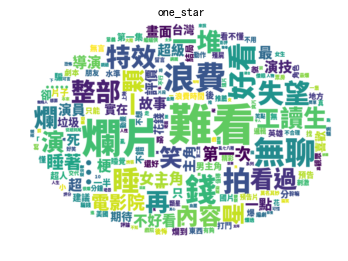

In [20]:
wordcloud = WordCloud(background_color="white", # 設定背景顏色
                      mask=mask, # 決定圖片的形狀
                      max_font_size=100, # 字體大小
                      font_path='data/NotoSansCJKtc-Black.otf', # 設定字型
                      random_state=38).fit_words(neg_counter) # 丟入文字

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("one_star")
plt.axis("off")
plt.savefig("plots/one_star_wordcloud.png", dpi = 700)
plt.show()

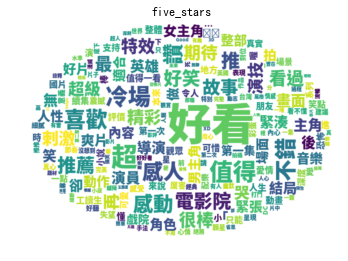

In [21]:
wordcloud = WordCloud(background_color="white",
                      mask=mask, max_font_size=100, 
                      font_path='data/NotoSansCJKtc-Black.otf', 
                      random_state=38).fit_words(pos_counter)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("five_stars")
plt.axis("off")
plt.savefig("plots/five_star_wordcloud.png", dpi = 700)
plt.show()

### 透過 TF - IDF 進行文字分析

In [22]:
jieba.analyse.set_stop_words(stop_words_path='data/stop_words.txt')

In [23]:
pos_words = jieba.analyse.extract_tags(pos_text, 500, withWeight=True)
print("TF-IDF 正面評價詞: ", pos_words[:20])

TF-IDF 正面評價詞:  [('好看', 0.35046641848219945), ('冷場', 0.08634639032531179), ('喜歡', 0.08113267819761817), ('不錯', 0.0809497409299798), ('感動', 0.0696076303364007), ('推薦', 0.062015733729408246), ('電影院', 0.0610095787573972), ('感人', 0.05791194316952854), ('看過', 0.053509150784223934), ('很棒', 0.04938324671552741), ('值得', 0.046042084046198105), ('超級', 0.044819630571401245), ('特效', 0.04203198723087989), ('好笑', 0.04028943972794778), ('畫面', 0.03887416937315414), ('演技', 0.037295957661138655), ('緊湊', 0.03640451626003611), ('導演', 0.03613011035857855), ('演員', 0.03567276718948262), ('精彩', 0.03346610862094294)]


In [24]:
neg_words = jieba.analyse.extract_tags(neg_text, 500, withWeight=True)
print("TF-IDF 負面評價詞: ", neg_words[:20])

TF-IDF 負面評價詞:  [('難看', 0.19875586059220587), ('爛片', 0.17172506355166586), ('浪費', 0.09262023103596793), ('無聊', 0.09023516070886146), ('工讀生', 0.05207403547515794), ('看過', 0.051676523753973524), ('整部', 0.0505090388113653), ('內容', 0.049291453426867055), ('特效', 0.04899211883229966), ('一顆', 0.04889394170568265), ('好看', 0.048496240577029996), ('電影院', 0.04770140654212941), ('睡著', 0.04650887137857618), ('不好看', 0.042931265887916466), ('導演', 0.04253375416673206), ('失望', 0.03922571205328589), ('一點', 0.038161125233703526), ('演員', 0.03776361351251912), ('一堆', 0.03596293062804416), ('超級', 0.035776054906597056)]


In [25]:
# 經過 TF-IDF 篩選過之後的文字雲
wordcloud = WordCloud(background_color="white", 
                      mask=mask,
                      max_font_size=100,
                      font_path='data/NotoSansCJKtc-Black.otf', 
                      random_state=8).fit_words(dict(neg_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("one_star")
plt.axis("off")
plt.savefig("plots/one_star_wordcloud_tfidf.png", dpi = 700)
plt.show()

In [26]:
# 經過 TF-IDF 篩選過之後的文字雲
wordcloud = WordCloud(background_color="white",
                      mask=mask,
                      max_font_size=100,
                      font_path='data/NotoSansCJKtc-Black.otf', 
                      random_state=8).fit_words(dict(pos_words)) 

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("five_stars")
plt.axis("off")
plt.savefig("plots/five_star_wordcloud_tfidf.png", dpi = 700)
plt.show()

###  regression 與 classification 

這邊對我們的票房資料做一些簡單的回歸與分類
regression 使用 linear regression，classification 則會使用 decision tree

In [27]:
# import 套件
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [28]:
movie_box = pd.read_csv("data/movies_box_office_revised.csv")  # 讀取票房資料

In [29]:
movie_box.head()

排名          中文片名                                     英文片名  院數   映期  \
0   1  美國隊長3 : 英雄內戰                        Captain America 3  24   86   
1   2       惡棍英雄：死侍                                 Deadpool  23   80   
2   3          屍速列車                           Train to Busan  22   78   
3   4      怪獸與牠們的產地  Fantastic Beasts and Where to Find Them  24  113   
4   5          奇異博士                           Doctor Strange  23  108   

         上映日期       平均票房         累積票房    年度  
0  2016/04/27  7652852.0  183668450.0  2016  
1  2016/02/09  6200975.0  142622425.0  2016  
2  2016/09/02  6047077.0  133035683.0  2016  
3  2016/11/17  4942212.0  118613078.0  2016  
4  2016/10/25  5049736.0  116143931.0  2016

In [30]:
movie_box["平均星等"] = movies_comments.groupby("movie_cht", sort=False)["star"].mean().values # 將平均星等放進票房資料的 DF
movie_box.head()

排名          中文片名                                     英文片名  院數   映期  \
0   1  美國隊長3 : 英雄內戰                        Captain America 3  24   86   
1   2       惡棍英雄：死侍                                 Deadpool  23   80   
2   3          屍速列車                           Train to Busan  22   78   
3   4      怪獸與牠們的產地  Fantastic Beasts and Where to Find Them  24  113   
4   5          奇異博士                           Doctor Strange  23  108   

         上映日期       平均票房         累積票房    年度      平均星等  
0  2016/04/27  7652852.0  183668450.0  2016  4.187179  
1  2016/02/09  6200975.0  142622425.0  2016  3.538235  
2  2016/09/02  6047077.0  133035683.0  2016  4.296842  
3  2016/11/17  4942212.0  118613078.0  2016  4.235714  
4  2016/10/25  5049736.0  116143931.0  2016  4.156000

In [31]:
# 切 training data 跟 testing data
X_train, X_test, y_train, y_test = train_test_split(movie_box["平均星等"], np.log10(movie_box["平均票房"]), random_state = 22)

# 建立 LinearRegression 模型
reg = LinearRegression()

# 放進 traingin data 進行訓練 (因為只有一個自變數，新版的 sklearn 必須做 reshape)
reg.fit(X = X_train.values.reshape(-1, 1), y = y_train)

# 用 testing data 做 prediction
y_pred = reg.predict(X_test.values.reshape(-1, 1))

# 算出 testing data 與預測結果的 correlation
print(pearsonr(y_pred, y_test)[0])

0.2128264837


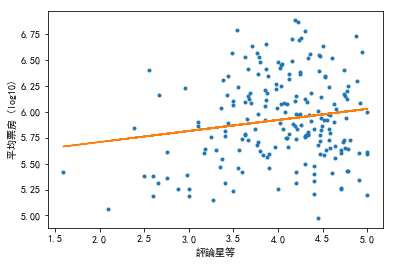

In [32]:
# 把全部的 data 畫上 fit 之後的線
reg.fit(X = movie_box["平均星等"].values.reshape(-1, 1), y = np.log10(movie_box["平均票房"]))
y_pred = reg.predict(movie_box["平均星等"].values.reshape(-1, 1))

plt.plot(movie_box["平均星等"], np.log10(movie_box["平均票房"]), ".")
plt.plot(movie_box["平均星等"], y_pred)
plt.xlabel("評論星等")
plt.ylabel("平均票房 (log10)")
plt.savefig("plots/scatter_plot_star_movie.png", dpi = 700)
plt.tight_layout
plt.show()

### 1. 加上更多 features
加上評論數量、映期等其他 features，看看 performace 會不會變好

In [33]:
movie_box["評論數量"] = movies_comments.groupby("movie_cht", as_index=False, sort=False).size().values

In [34]:
movie_box.head()

排名          中文片名                                     英文片名  院數   映期  \
0   1  美國隊長3 : 英雄內戰                        Captain America 3  24   86   
1   2       惡棍英雄：死侍                                 Deadpool  23   80   
2   3          屍速列車                           Train to Busan  22   78   
3   4      怪獸與牠們的產地  Fantastic Beasts and Where to Find Them  24  113   
4   5          奇異博士                           Doctor Strange  23  108   

         上映日期       平均票房         累積票房    年度      平均星等  評論數量  
0  2016/04/27  7652852.0  183668450.0  2016  4.187179   390  
1  2016/02/09  6200975.0  142622425.0  2016  3.538235   340  
2  2016/09/02  6047077.0  133035683.0  2016  4.296842   950  
3  2016/11/17  4942212.0  118613078.0  2016  4.235714   280  
4  2016/10/25  5049736.0  116143931.0  2016  4.156000   250

In [35]:
# 做 train/test split
X_train, X_test, y_train, y_test = train_test_split(movie_box[["評論數量", "平均星等", "映期"]], np.log10(movie_box["平均票房"]), random_state = 22)

# 訓練模型
reg.fit(X = X_train, y = y_train)

# 用 testing data 做預測
y_pred = reg.predict(X_test)

# 算出 testing data 與預測結果的 correlation
print(pearsonr(y_pred, y_test)[0])

0.735828489313


In [36]:
# 把預測結果畫成 Scatter plot
plt.scatter(x=y_pred, y=y_test)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.text(6.9, 6.05, "六弄咖啡館")
plt.show()

## 2. 改成分類問題

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [38]:
movie_box.head()

排名          中文片名                                     英文片名  院數   映期  \
0   1  美國隊長3 : 英雄內戰                        Captain America 3  24   86   
1   2       惡棍英雄：死侍                                 Deadpool  23   80   
2   3          屍速列車                           Train to Busan  22   78   
3   4      怪獸與牠們的產地  Fantastic Beasts and Where to Find Them  24  113   
4   5          奇異博士                           Doctor Strange  23  108   

         上映日期       平均票房         累積票房    年度      平均星等  評論數量  
0  2016/04/27  7652852.0  183668450.0  2016  4.187179   390  
1  2016/02/09  6200975.0  142622425.0  2016  3.538235   340  
2  2016/09/02  6047077.0  133035683.0  2016  4.296842   950  
3  2016/11/17  4942212.0  118613078.0  2016  4.235714   280  
4  2016/10/25  5049736.0  116143931.0  2016  4.156000   250

In [39]:
movie_box["叫座"] = (movie_box["平均票房"] > movie_box["平均票房"].median()) * 1  # 設定 叫座 = 平均票房大於中位數

In [40]:
X_train, X_test, y_train, y_test = train_test_split(movie_box[["評論數量", "平均星等", "映期"]], movie_box["叫座"], random_state = 22)

In [41]:
clf = DecisionTreeClassifier(max_depth=3) # 限定最大深度不得超過 3 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [42]:
print("feature importance")
print("評論數量: ",clf.feature_importances_[0])
print("平均星等: ",clf.feature_importances_[1])
print("映期: ",clf.feature_importances_[2])

feature importance
評論數量:  0.69126760493
平均星等:  0.0442048656578
映期:  0.264527529413


In [43]:
y_pred = clf.predict(X_test)  # 使用 testing data 做預測

In [44]:
print("準確率: ", accuracy_score(y_test, y_pred)) # 計算 testing data 的準確率

準確率:  0.84


### 簡單的 EDA

In [45]:
# 評價低卻在票房排行榜上的電影
plt.rcParams['font.sans-serif']=['SimHei'] # 使用微軟正黑體
movies_comments.groupby("movie_cht")["star"].mean().sort_values().head(30).plot.bar()
plt.ylabel("average star")
plt.tight_layout()
plt.savefig("plots/average_star.png", dpi = 500)
plt.show()

In [46]:
# 2016 與 2017 的平均票房差異 (2017 年度還沒結束)
movie_box.groupby("年度", as_index=False, sort=False)["平均票房"].mean()

年度        平均票房
0  2016  1637697.35
1  2017  1006818.34

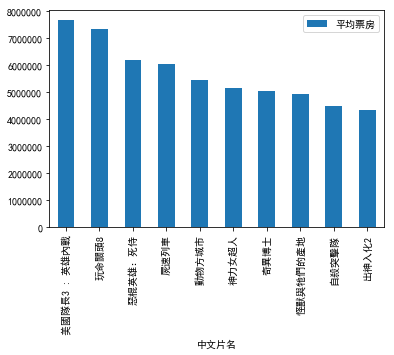

In [47]:
# 平均票房排行榜
movie_box.sort_values(by="平均票房", ascending=False)[["中文片名", "平均票房"]][:10].plot("中文片名", "平均票房", kind="bar")
plt.show()